# DATA COLLECTION

In [1]:
!pip install --upgrade pip

Requirement already up-to-date: pip in c:\users\andyo\anaconda3\lib\site-packages (20.2.4)


In [2]:
#!pip3 install twint
!pip install -U textblob
!pip install emoji --upgrade
!pip install --upgrade pip
!pip install wordcloud
!pip install nest_asyncio
!pip install twint module from its repo


Requirement already up-to-date: textblob in c:\users\andyo\anaconda3\lib\site-packages (0.15.3)
Requirement already up-to-date: emoji in c:\users\andyo\anaconda3\lib\site-packages (0.6.0)
Requirement already up-to-date: pip in c:\users\andyo\anaconda3\lib\site-packages (20.2.4)
  Using cached pylint-2.4.4-py3-none-any.whl (302 kB)


ERROR: After October 2020 you may experience errors when installing or updating packages. This is because pip will change the way that it resolves dependency conflicts.

We recommend you use --use-feature=2020-resolver to test your packages with the new resolver before it becomes the default.

spyder 4.1.4 requires pyqt5<5.13; python_version >= "3", which is not installed.
spyder 4.1.4 requires pyqtwebengine<5.13; python_version >= "3", which is not installed.


  Using cached astroid-2.3.3-py3-none-any.whl (205 kB)
  Attempting uninstall: astroid
    Found existing installation: astroid 2.4.2
    Uninstalling astroid-2.4.2:
      Successfully uninstalled astroid-2.4.2
  Attempting uninstall: pylint
    Found existing installation: pylint 2.6.0
    Uninstalling pylint-2.6.0:
      Successfully uninstalled pylint-2.6.0


In [3]:
!pip3 install --user --upgrade git+https://github.com/twintproject/twint.git@origin/master#egg=twint

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.



  Cloning https://github.com/twintproject/twint.git (to revision origin/master) to c:\users\andyo\appdata\local\temp\pip-install-9716d75y\twint
  Created wheel for twint: filename=twint-2.1.21-py3-none-any.whl size=38948 sha256=20c838b43ee342e23eabb14ad9f79eb941e5bb3c8e9778cf30e39f3b7fc8c250
  Stored in directory: C:\Users\andyo\AppData\Local\Temp\pip-ephem-wheel-cache-_cul_vj9\wheels\82\67\14\5495652787d3c55288164de4234c0712a1f785a64f61f1ea70
Successfully built twint
  Attempting uninstall: twint
    Found existing installation: twint 2.1.21
    Uninstalling twint-2.1.21:
      Successfully uninstalled twint-2.1.21


In [4]:
conda install -c conda-forge/label/gcc7 missingno 

Solving environment: ...working... done

# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.


In [5]:
#scientific and machine learning libraries
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import confusion_matrix,f1_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
#plotting options
import seaborn as sns
import re
import matplotlib.pyplot as plt
import missingno as ms
#% matplotlib inline
pd.set_option('display.max_colwidth',None)
import seaborn as sns
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
#twint
import twint
#to avoid problems with running twint
import nest_asyncio
nest_asyncio.apply()


In [6]:
import re
import nltk
from nltk.tokenize import word_tokenize
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer
import spacy

# importing package to recognize stop words i.e. the, and, an etc
from spacy.lang.en.stop_words import STOP_WORDS
stop_words = spacy.lang.en.stop_words.STOP_WORDS

import datetime

import plotly.express as px

#nltk.download('punkt')
stop_words = spacy.lang.en.stop_words.STOP_WORDS

stemmer = PorterStemmer()

In [7]:
## Sources: 

keywords = ["Facemask"]

search_concatenation = keywords


In [8]:
search_concatenation

['Facemask']

In [9]:
len(search_concatenation)

1

In [10]:
# the concept is to perform the scraping using the elements in the lists above: imm_basic, immigrant_mod, migrant_mod and refugee_mod
df = []
for s in search_concatenation:
    config = twint.Config()
    config.Search = s
    config.Lang = "en"
    config.Limit = 2000
    config.Since = "2020-04-01 00:00:00"
    config.Until = "2020-11-13 00:00:00"
    config.Hide_output = True
    config.Pandas = True
    twint.run.Search(config)
    Tweets_df = twint.storage.panda.Tweets_df
    df.append(Tweets_df)  
    
# see pd.concat documentation for more info
df = pd.concat(df).sort_values(by=['date']).reset_index()


print(len(df))

2093


In [11]:
df.shape

(2093, 39)

In [12]:
# with this command I'm checking 

df.groupby('search').sum().shape, len(search_concatenation)

((1, 9), 1)

In [13]:
##Save Uncleaned Data
#df.to_csv('uncleaned_data.csv')

In [14]:
#df=pd.read_csv('uncleaned_data.csv')

# DATA CLEANING

In [15]:
df.head()

,index,id,conversation_id,created_at,date,timezone,place,tweet,language,hashtags,...,geo,source,user_rt_id,user_rt,retweet_id,reply_to,retweet_date,translate,trans_src,trans_dest
0,2092,1326576068422062080,1326576068422062080,1.605115e+12,2020-11-11 12:22:35,-0500,,Wear a face mask!,en,[],...,,,,,,[],,,,
1,2091,1326576084683423745,1326574368831500291,1.605115e+12,2020-11-11 12:22:39,-0500,,@NiallStanage @nominalthoughts its good but not new. there is another one photoshopped onto a real tweet from Biden to trump last week.,en,[],...,,,,,,"[{'screen_name': 'NiallStanage', 'name': 'Niall Stanage', 'id': '24951142'}, {'screen_name': 'nominalthoughts', 'name': 'Jason Harrison', 'id': '1025216100718583809'}]",,,,
2,2090,1326576106586202112,1326576106586202112,1.605115e+12,2020-11-11 12:22:45,-0500,,"""The answer's none... not a single face mask..."" nicely timed 30 second clip provided by Johnson for @Keir_Starmer to use at election time, if Johnson is still around...👇",en,[],...,,,,,,[],,,,
3,2089,1326576145115049984,1326576145115049984,1.605115e+12,2020-11-11 12:22:54,-0500,,do a face mask,en,[],...,,,,,,[],,,,
4,2088,1326576156028493824,1326576156028493824,1.605115e+12,2020-11-11 12:22:56,-0500,,Bambam tulog tulog den,tl,[],...,,,,,,[],,,,


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2093 entries, 0 to 2092
Data columns (total 39 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   index            2093 non-null   int64  
 1   id               2093 non-null   object 
 2   conversation_id  2093 non-null   object 
 3   created_at       2093 non-null   float64
 4   date             2093 non-null   object 
 5   timezone         2093 non-null   object 
 6   place            2093 non-null   object 
 7   tweet            2093 non-null   object 
 8   language         2093 non-null   object 
 9   hashtags         2093 non-null   object 
 10  cashtags         2093 non-null   object 
 11  user_id          2093 non-null   int64  
 12  user_id_str      2093 non-null   object 
 13  username         2093 non-null   object 
 14  name             2093 non-null   object 
 15  day              2093 non-null   int64  
 16  hour             2093 non-null   object 
 17  link          

In [17]:
df['INCDTTM'] =  pd.to_datetime(df['date'], infer_datetime_format=True)
df['Time'] = [datetime.datetime.time(d) for d in df['INCDTTM']] 
df['Date'] = [datetime.datetime.date(d) for d in df['INCDTTM']]
df['Year'] = [datetime.datetime.date(d).year for d in df['INCDTTM']] 
df['Month'] = [datetime.datetime.date(d).month for d in df['INCDTTM']] 
df = df.drop(columns = ['date','INCDTTM'])
df.head()

,index,id,conversation_id,created_at,timezone,place,tweet,language,hashtags,cashtags,...,retweet_id,reply_to,retweet_date,translate,trans_src,trans_dest,Time,Date,Year,Month
0,2092,1326576068422062080,1326576068422062080,1.605115e+12,-0500,,Wear a face mask!,en,[],[],...,,[],,,,,12:22:35,2020-11-11,2020,11
1,2091,1326576084683423745,1326574368831500291,1.605115e+12,-0500,,@NiallStanage @nominalthoughts its good but not new. there is another one photoshopped onto a real tweet from Biden to trump last week.,en,[],[],...,,"[{'screen_name': 'NiallStanage', 'name': 'Niall Stanage', 'id': '24951142'}, {'screen_name': 'nominalthoughts', 'name': 'Jason Harrison', 'id': '1025216100718583809'}]",,,,,12:22:39,2020-11-11,2020,11
2,2090,1326576106586202112,1326576106586202112,1.605115e+12,-0500,,"""The answer's none... not a single face mask..."" nicely timed 30 second clip provided by Johnson for @Keir_Starmer to use at election time, if Johnson is still around...👇",en,[],[],...,,[],,,,,12:22:45,2020-11-11,2020,11
3,2089,1326576145115049984,1326576145115049984,1.605115e+12,-0500,,do a face mask,en,[],[],...,,[],,,,,12:22:54,2020-11-11,2020,11
4,2088,1326576156028493824,1326576156028493824,1.605115e+12,-0500,,Bambam tulog tulog den,tl,[],[],...,,[],,,,,12:22:56,2020-11-11,2020,11


In [18]:
df.columns

Index(['index', 'id', 'conversation_id', 'created_at', 'timezone', 'place',
       'tweet', 'language', 'hashtags', 'cashtags', 'user_id', 'user_id_str',
       'username', 'name', 'day', 'hour', 'link', 'urls', 'photos', 'video',
       'thumbnail', 'retweet', 'nlikes', 'nreplies', 'nretweets', 'quote_url',
       'search', 'near', 'geo', 'source', 'user_rt_id', 'user_rt',
       'retweet_id', 'reply_to', 'retweet_date', 'translate', 'trans_src',
       'trans_dest', 'Time', 'Date', 'Year', 'Month'],
      dtype='object')

In [19]:
df=df.drop(['index', 'id', 'conversation_id', 'created_at', 'timezone', 'language', 'hashtags', 'cashtags', 'user_id', 'user_id_str',
       'username', 'name', 'day', 'hour', 'link', 'urls', 'photos', 'video',
       'thumbnail', 'retweet', 'nlikes', 'nreplies', 'nretweets', 'quote_url',
       'search', 'source', 'user_rt_id', 'user_rt',
       'retweet_id', 'reply_to', 'retweet_date', 'translate', 'trans_src',
       'trans_dest', 'Time',], axis=1)

In [20]:
df.head()

,place,tweet,near,geo,Date,Year,Month
0,,Wear a face mask!,,,2020-11-11,2020,11
1,,@NiallStanage @nominalthoughts its good but not new. there is another one photoshopped onto a real tweet from Biden to trump last week.,,,2020-11-11,2020,11
2,,"""The answer's none... not a single face mask..."" nicely timed 30 second clip provided by Johnson for @Keir_Starmer to use at election time, if Johnson is still around...👇",,,2020-11-11,2020,11
3,,do a face mask,,,2020-11-11,2020,11
4,,Bambam tulog tulog den,,,2020-11-11,2020,11


In [21]:
df['tweet'].nunique()

2085

In [22]:
# load library
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# download the set of stop words the first time
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\andyo\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [25]:
# Load stop words
stop_words = stopwords.words('english')

# Show stop words
stop_words[:10]

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]

In [26]:
#### Now creating some functions to do text processing
# Removing hashtags and mentions
def get_hashtags(text):
    hashtags = re.findall(r'\#\w+',text.lower())
    return hashtags
def get_mentions(text):
    mentions = re.findall(r'\@\w+',text.lower())
    return mentions

# Cleaning up the text of the tweets
def remove_content(text):
    text = re.sub(r"http\S+", "", text) #remove urls
    text=re.sub(r'\S+\.com\S+','',text) #remove urls
    text=re.sub(r'\@\w+','',text) #remove mentions
    text =re.sub(r'\#\w+','',text) #remove hashtags
    return text

def process_tweet(tweet):
    """ 
    tweets cleaning by 
    1) lowering the case of the tweet, 
    2) removing unwanted symbols and replacing them with a whitespace, 
    3) split sentences into words according to whitespaces and then 
    4) join back with a single whitespace as separator between various words
    """
    return " ".join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])", " ",tweet.lower()).split())

def process_text(text, stem=False): #clean text
    text=remove_content(text)
    lemmatizer=WordNetLemmatizer()
    text = re.sub('[^A-Za-z]', ' ', text.lower()) #remove non-alphabets
    text = re.sub(r'@[A-Za-z0-9]+', '', str(text)) # remove @mentions
    text = re.sub(r'#', '',  str(text)) # remove the '#' symbol
    text = re.sub(r'RT[\s]+', '',  str(text)) # remove RT
    text = re.sub(r'https?\/\/S+', '',  str(text)) # remove the hyperlink
    text = re.sub(r'http\S+', '',  str(text)) # remove the hyperlink
    text = re.sub(r'www\S+', '',  str(text)) # remove the www
    text = re.sub(r'twitter+', '',  str(text)) # remove the twiiter
    text = re.sub(r'pic+', '',  str(text)) # remove the pic
    text = re.sub(r'com', '',  str(text)) # remove the pic
    text = re.sub(r"\bamp\b", ' ', text.lower()) #remove "amp" which is coming from the translation of &
    text = re.sub(r"\bco\b", ' ', text.lower()) #remove "co" which was one of the top words found below
    tokenized_text = word_tokenize(text) #tokenize
    #tokenized_text = [lemmatizer.lemmatize(word) for word in tokenized_text]
    clean_text = [
         word for word in tokenized_text
         if (word not in stop_words and len(word)>1)
    ]
    if stem:
        clean_text=[stemmer.stem(word) for word in clean_text]
    clean_text = [lemmatizer.lemmatize(word) for word in clean_text]
    return ' '.join(clean_text)

#functions used to remove search terms from all the tweets
#function to remove duplicates from a string - in this case the string is the keywords used to scrape the tweets
def removeDupWithoutOrder(string): 
    words = string.lower().split()
    return " ".join(sorted(set(words), key=words.index)).replace('OR', '').replace('  ', ' ')

#function to search for string (i.e. tweet in this case) and remove specific words (search_terms in this case)
def remove_search(text, search_terms):
    query = text.lower()
    querywords = query.split()
    resultwords  = [word for word in querywords if word.lower() not in search_terms]
    return ' '.join(resultwords)

# define function to plot frequency of bi-grams, tri-grams, single words, phrases etc
from sklearn.feature_extraction.text import CountVectorizer
def plot_topn(sentences, ngram_range=(1,3), top=20,firstword=''):
    c=CountVectorizer(ngram_range=ngram_range)
    X=c.fit_transform(sentences)
    words=pd.DataFrame(X.sum(axis=0),columns=c.get_feature_names()).T.sort_values(0,ascending=False).reset_index()
    res=words[words['index'].apply(lambda x: firstword in x)].head(top)
    pl=px.bar(res, x='index',y=0)
    pl.update_layout(yaxis_title='count',xaxis_title='Phrases')
    pl.show('png')

In [27]:
# removing useless content (hashtags, mentions)
df['tweet']=df['tweet'].apply(lambda x: remove_content(x))

In [28]:
# Several functions applied here: processing the *tweet* to remove punctuation, hashtags, mentions
# then removing the search terms used to do the tweets scraping and re-process the *text* 

df['cleaned_tweets']=df['tweet'].apply(lambda x: process_tweet(x))

In [29]:
#this next row drops from the scraped tweets the same keywords that were used to perform the search.
#if these words are excluded, the sentiment analysis performed with text blob looks at the whole tweet 
#and can spit out a different sentiment wrt if leaving the search terms in. Perhaps worth test it out a bit
#and look at TextBlob with naivebayes too.

df['cleaned_tweets']=df['cleaned_tweets'].apply(lambda x: remove_search(x, search_concatenation))

#df['cleaned_tweets']=df['cleaned_tweets'].apply(lambda x: process_text(x))

In [30]:
df.head()

,place,tweet,near,geo,Date,Year,Month,cleaned_tweets
0,,Wear a face mask!,,,2020-11-11,2020,11,wear a face mask
1,,its good but not new. there is another one photoshopped onto a real tweet from Biden to trump last week.,,,2020-11-11,2020,11,its good but not new there is another one photoshopped onto a real tweet from biden to trump last week
2,,"""The answer's none... not a single face mask..."" nicely timed 30 second clip provided by Johnson for to use at election time, if Johnson is still around...👇",,,2020-11-11,2020,11,the answer s none not a single face mask nicely timed 30 second clip provided by johnson for to use at election time if johnson is still around
3,,do a face mask,,,2020-11-11,2020,11,do a face mask
4,,Bambam tulog tulog den,,,2020-11-11,2020,11,bambam tulog tulog den


In [31]:
df.tail()

,place,tweet,near,geo,Date,Year,Month,cleaned_tweets
2088,,Face Covering is less political than Face Mask. Why? Because...words?,,,2020-11-11,2020,11,face covering is less political than face mask why because words
2089,,Exactly who to fuck is wearing biden face mask.,,,2020-11-11,2020,11,exactly who to fuck is wearing biden face mask
2090,,my nephew scared of this clay face mask i got on😭😭 he woke up and said he ain’t wanna stay w me nomore,,,2020-11-11,2020,11,my nephew scared of this clay face mask i got on he woke up and said he ain t wanna stay w me nomore
2091,,"ok im taking a break what if i put on a face mask, shower and THEN start back studying yes yes",,,2020-11-11,2020,11,ok im taking a break what if i put on a face mask shower and then start back studying yes yes
2092,,Gnomes Face Mask. High Quality Cotton Fabric. Limited Edition. by ElegantJewelryCo via,,,2020-11-11,2020,11,gnomes face mask high quality cotton fabric limited edition by elegantjewelryco via


In [32]:
from wordcloud import WordCloud,ImageColorGenerator
from PIL import Image
import urllib
import requests
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt

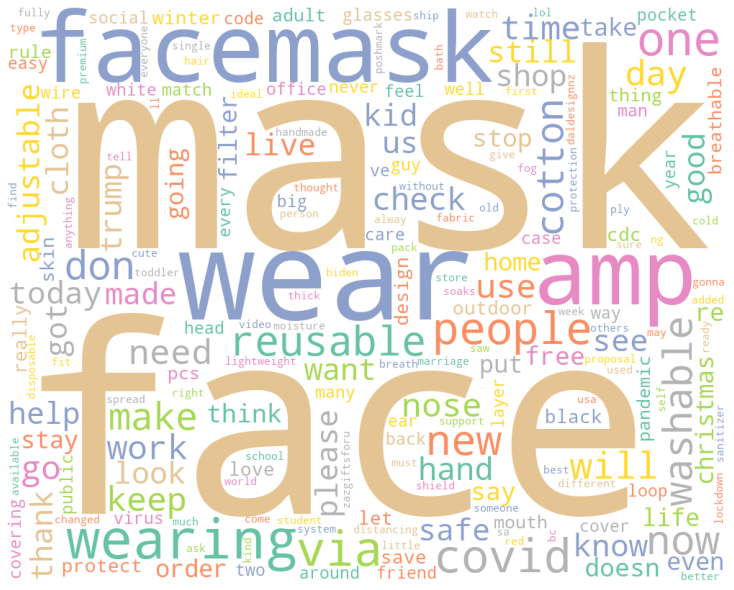

In [33]:
comment_words = '' 
stopwords = set(STOPWORDS) 
  
# iterate through the csv file 
for val in df.cleaned_tweets: 
      
    # typecaste each val to string 
    val = str(val) 
  
    # split the value 
    tokens = val.split() 
      
    # Converts each token into lowercase 
    for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower() 
      
    comment_words += " ".join(tokens)+" "
  
wordcloud = WordCloud(width = 1000, height = 800, 
                background_color='white', colormap='Set2', 
                collocations=False, 
                stopwords = stopwords, 
                min_font_size = 12).generate(comment_words) 
  
# plot the WordCloud image                        
plt.figure(figsize = (10, 10), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 

In [34]:
df.to_csv("Cleaned_Tweet.csv")

# Data Analysis

In [35]:
import pandas as pd
import numpy as np
import string
import re
import nltk
from textblob import TextBlob
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [36]:
def getSubjectivity(text):
    return TextBlob( str(text)).sentiment.subjectivity

def getPolarity(text):
    return TextBlob( str(text)).sentiment.polarity

In [37]:
df.dropna(subset=['cleaned_tweets'], inplace = True)
df.reset_index(drop=True, inplace=True)

In [38]:
df['Subjectivity'] = df['cleaned_tweets'].apply(getSubjectivity)
df['Polarity'] = df['cleaned_tweets'].apply(getPolarity)
df.head()

,place,tweet,near,geo,Date,Year,Month,cleaned_tweets,Subjectivity,Polarity
0,,Wear a face mask!,,,2020-11-11,2020,11,wear a face mask,0.000000,0.000000
1,,its good but not new. there is another one photoshopped onto a real tweet from Biden to trump last week.,,,2020-11-11,2020,11,its good but not new there is another one photoshopped onto a real tweet from biden to trump last week,0.355303,0.207955
2,,"""The answer's none... not a single face mask..."" nicely timed 30 second clip provided by Johnson for to use at election time, if Johnson is still around...👇",,,2020-11-11,2020,11,the answer s none not a single face mask nicely timed 30 second clip provided by johnson for to use at election time if johnson is still around,0.404762,0.211905
3,,do a face mask,,,2020-11-11,2020,11,do a face mask,0.000000,0.000000
4,,Bambam tulog tulog den,,,2020-11-11,2020,11,bambam tulog tulog den,0.000000,0.000000


In [39]:
# Create a function to compute negative (-1), neutral (0) and positive (+1) analysis
def get_Polarity_Analysis(score):
    if score < 0:
      return 'Negative'
    elif score == 0:
      return 'Neutral'
    else:
      return 'Positive'
def get_Subjectivity_Analysis(score):
    if score >  0:
      return 'Opinion'
    else:
      return 'Fact'

df['Analysis_Polarity'] = df['Polarity'].apply(get_Polarity_Analysis)

df['Analysis_Subjectivity'] = df['Subjectivity'].apply(get_Subjectivity_Analysis)

# Show the dataframe
df.head()



,place,tweet,near,geo,Date,Year,Month,cleaned_tweets,Subjectivity,Polarity,Analysis_Polarity,Analysis_Subjectivity
0,,Wear a face mask!,,,2020-11-11,2020,11,wear a face mask,0.000000,0.000000,Neutral,Fact
1,,its good but not new. there is another one photoshopped onto a real tweet from Biden to trump last week.,,,2020-11-11,2020,11,its good but not new there is another one photoshopped onto a real tweet from biden to trump last week,0.355303,0.207955,Positive,Opinion
2,,"""The answer's none... not a single face mask..."" nicely timed 30 second clip provided by Johnson for to use at election time, if Johnson is still around...👇",,,2020-11-11,2020,11,the answer s none not a single face mask nicely timed 30 second clip provided by johnson for to use at election time if johnson is still around,0.404762,0.211905,Positive,Opinion
3,,do a face mask,,,2020-11-11,2020,11,do a face mask,0.000000,0.000000,Neutral,Fact
4,,Bambam tulog tulog den,,,2020-11-11,2020,11,bambam tulog tulog den,0.000000,0.000000,Neutral,Fact


In [40]:
df.to_csv("PolaritySubjectivityFacemask.csv")

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2093 entries, 0 to 2092
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   place                  2093 non-null   object 
 1   tweet                  2093 non-null   object 
 2   near                   2093 non-null   object 
 3   geo                    2093 non-null   object 
 4   Date                   2093 non-null   object 
 5   Year                   2093 non-null   int64  
 6   Month                  2093 non-null   int64  
 7   cleaned_tweets         2093 non-null   object 
 8   Subjectivity           2093 non-null   float64
 9   Polarity               2093 non-null   float64
 10  Analysis_Polarity      2093 non-null   object 
 11  Analysis_Subjectivity  2093 non-null   object 
dtypes: float64(2), int64(2), object(8)
memory usage: 196.3+ KB


# SENTIMENT ANALYSIS

In [42]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
sns.set(font_scale=2)

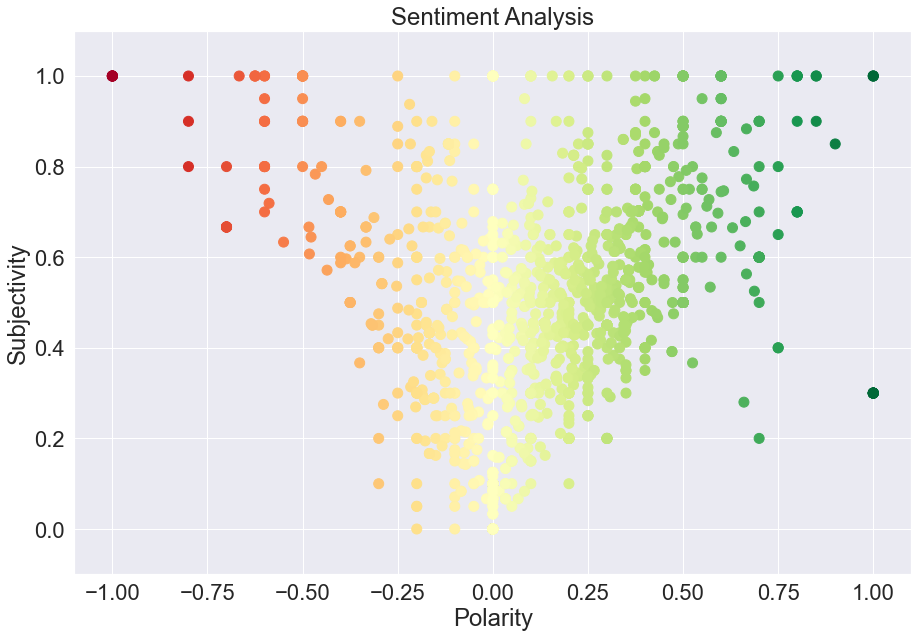

(None,)

In [43]:
plt.figure(figsize=(15,10)) 

# plt.style.use('seaborn-pastel')

plt.scatter(df['Polarity'], df['Subjectivity'], c=df['Polarity'], s=100, cmap='RdYlGn') 

plt.xlim(-1.1, 1.1)
plt.ylim(-0.1, 1.1) 
plt.title('Sentiment Analysis') 
plt.xlabel('Polarity') 
plt.ylabel('Subjectivity') 
plt.show(),

In [44]:
# Show the value counts
df['Analysis_Polarity'].value_counts()

Neutral     909
Positive    830
Negative    354
Name: Analysis_Polarity, dtype: int64

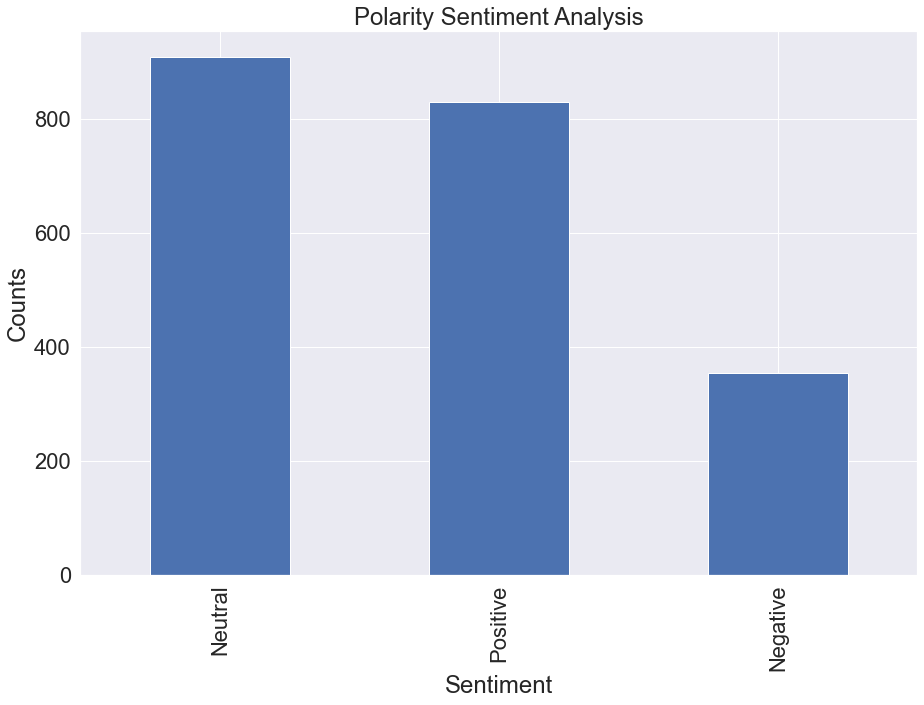

In [76]:
# Plotting and visualizing the counts
plt.figure(figsize=(15,10)) 

plt.title('Polarity Sentiment Analysis')
plt.xlabel('Sentiment')
plt.ylabel('Counts')
df['Analysis_Polarity'].value_counts().plot(kind = 'bar')
plt.show()

# Sentiment Analysis Pie Chart

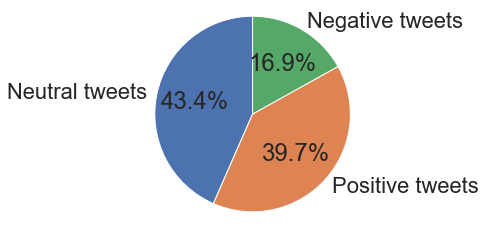

In [77]:
positive_polarity = [p for p in df['Polarity'] if p>0]
negative_polarity = [n for n in df['Polarity'] if n<0]
neutral_polarity = [r for r in df['Polarity'] if r==0]

total_size = len(positive_polarity) + len(negative_polarity) + len(neutral_polarity)
n_size = len(negative_polarity)/total_size
p_size = len(positive_polarity)/total_size
r_size = len(neutral_polarity)/total_size

labels = ['Neutral tweets', 'Positive tweets', 'Negative tweets']
sizes = [r_size, p_size, n_size]
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
	        shadow=False, startangle=90)
ax1.axis('equal')
plt.show()

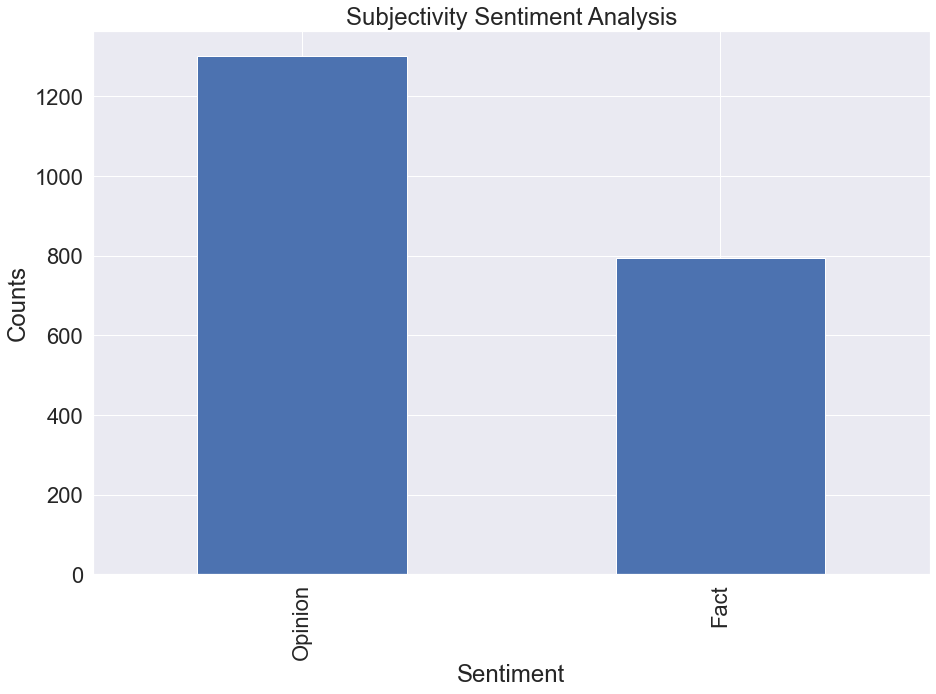

In [78]:
# Plotting and visualizing the counts
plt.figure(figsize=(15,10)) 

plt.title('Subjectivity Sentiment Analysis')
plt.xlabel('Sentiment')
plt.ylabel('Counts')
df['Analysis_Subjectivity'].value_counts().plot(kind = 'bar')
plt.show()

In [79]:
# Show the value counts
df['Analysis_Subjectivity'].value_counts()

Opinion    1300
Fact        793
Name: Analysis_Subjectivity, dtype: int64

# TOPIC MODELING

In [80]:
import pyLDAvis
import pyLDAvis.gensim
import pyLDAvis.sklearn
pyLDAvis.enable_notebook()

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation

In [81]:
tf_vectorizer = CountVectorizer(strip_accents = 'unicode',
                                stop_words = 'english',
                                lowercase = True,
                                token_pattern = r'\b[a-zA-Z]{3,}\b',
                                max_df = 0.5, 
                                min_df = 10)
dtm_tf = tf_vectorizer.fit_transform(df['cleaned_tweets'].values.astype('U'))
print(dtm_tf.shape)

(2093, 346)


In [82]:
tfidf_vectorizer = TfidfVectorizer(**tf_vectorizer.get_params())
dtm_tfidf = tfidf_vectorizer.fit_transform(df['cleaned_tweets'].values.astype('U'))
print(dtm_tfidf.shape)

(2093, 346)


C:\Users\andyo\anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:1795: UserWarning:

Only (<class 'numpy.float64'>, <class 'numpy.float32'>, <class 'numpy.float16'>) 'dtype' should be used. <class 'numpy.int64'> 'dtype' will be converted to np.float64.



In [83]:
# for TF DTM
lda_tf = LatentDirichletAllocation(n_components =8, random_state=50)
lda_tf.fit(dtm_tf)
# for TFIDF DTM
lda_tfidf = LatentDirichletAllocation(n_components =8, random_state=50)
lda_tfidf.fit(dtm_tfidf)

LatentDirichletAllocation(n_components=8, random_state=50)

In [84]:
#for i,topic in enumerate(lda_tf.components_):
#print([tfidf_vectorizer.get_feature_names()[i] for i in topic.argsort()[-10:]])
#print('\n')

In [85]:
for i,topic in enumerate(lda_tf.components_):
    print(f'Top 10 words for topic #{i}:')
    print([tfidf_vectorizer.get_feature_names()[i] for i in topic.argsort()[-30:]])
    print('\n')

Top 10 words for topic #0:
['postage', 'dgn', 'ada', 'jual', 'buat', 'utk', 'sbb', 'exclude', 'match', 'shit', 'price', 'pun', 'don', 'hit', 'different', 'kind', 'closet', 'poshmark', 'check', 'cdc', 'added', 'rule', 'changed', 'ear', 'head', 'loop', 'big', 'amp', 'like', 'just']


Top 10 words for topic #1:
['machine', 'comfort', 'fully', 'printed', 'excited', 'white', 'office', 'available', 'premium', 'ply', 'usa', 'work', 'zazgiftsforu', 'marriage', 'proposal', 'daldesignnz', 'mouth', 'code', 'cotton', 'cover', 'home', 'adult', 'breathable', 'shop', 'cloth', 'check', 'new', 'washable', 'reusable', 'masks']


Top 10 words for topic #2:
['half', 'watch', 'gonna', 'good', 'wear', 'match', 'clean', 'night', 'trying', 'coming', 'protection', 'used', 'hands', 'got', 'tell', 'sanitizer', 'students', 'think', 'cold', 'know', 'feel', 'help', 'hand', 'christmas', 'skin', 'just', 'winter', 'want', 'people', 'don']


Top 10 words for topic #3:
['protect', 'contoured', 'ship', 'ready', 'soaks', 

In [86]:
pyLDAvis.sklearn.prepare(lda_tf, dtm_tf, tf_vectorizer)

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
5     -0.168972  0.047227       1        1  14.946327
1      0.231454  0.147579       2        1  14.654988
6     -0.137129  0.121147       3        1  12.956088
3      0.325387  0.055232       4        1  12.875012
2     -0.151439 -0.148694       5        1  12.541743
0      0.103921 -0.352442       6        1  11.906238
7     -0.091837  0.053508       7        1  10.398970
4     -0.111386  0.076441       8        1   9.720635, topic_info=         Term        Freq       Total Category  logprob  loglift
89   facemask  169.000000  169.000000  Default  30.0000  30.0000
142      just  160.000000  160.000000  Default  29.0000  29.0000
327      wear  194.000000  194.000000  Default  28.0000  28.0000
154      like  116.000000  116.000000  Default  27.0000  27.0000
6         amp  181.000000  181.000000  Default  26.0000  26.0000
..        ...         ...         ...      ...      ...      ...
151       let   10.971381   28.530755   Topic8  -4.3103   1.3752
315     virus   10.478871   25.537968   Topic8  -4.3562   1.4401
229    public   10.118824   25.798597   Topic8  -4.3911   1.3950
6         amp   14.792888  181.292624   Topic8  -4.0114  -0.1750
337      work    9.493055   55.084464   Topic8  -4.4550   0.5726

[350 rows x 6 columns], token_table=      Topic      Freq          Term
term                               
1         6  0.934009           ada
2         6  0.967355         added
3         4  0.982609    adjustable
4         2  0.978503         adult
5         5  0.722308           air
...     ...       ...           ...
340       3  0.961293           wow
343       2  0.952472        yellow
344       1  0.728146           yes
344       5  0.218444           yes
345       2  0.957123  zazgiftsforu

[525 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[6, 2, 7, 4, 3, 1, 8, 5])

In [87]:
topic_values = lda_tf.transform(dtm_tf)
topic_values.shape

(2093, 8)

In [88]:
df.head()

,place,tweet,near,geo,Date,Year,Month,cleaned_tweets,Subjectivity,Polarity,Analysis_Polarity,Analysis_Subjectivity,Topic
0,,Wear a face mask!,,,2020-11-11,2020,11,wear a face mask,0.000000,0.000000,Neutral,Fact,7
1,,its good but not new. there is another one photoshopped onto a real tweet from Biden to trump last week.,,,2020-11-11,2020,11,its good but not new there is another one photoshopped onto a real tweet from biden to trump last week,0.355303,0.207955,Positive,Opinion,5
2,,"""The answer's none... not a single face mask..."" nicely timed 30 second clip provided by Johnson for to use at election time, if Johnson is still around...👇",,,2020-11-11,2020,11,the answer s none not a single face mask nicely timed 30 second clip provided by johnson for to use at election time if johnson is still around,0.404762,0.211905,Positive,Opinion,7
3,,do a face mask,,,2020-11-11,2020,11,do a face mask,0.000000,0.000000,Neutral,Fact,0
4,,Bambam tulog tulog den,,,2020-11-11,2020,11,bambam tulog tulog den,0.000000,0.000000,Neutral,Fact,0


In [89]:
# for TF DTM
#lda_tf = LatentDirichletAllocation(n_components =6, random_state=42)
#lda_tf.fit(dtm_tf)
# for TFIDF DTM
#lda_tfidf = LatentDirichletAllocation(n_components =6, random_state=42)
#lda_tfidf.fit(dtm_tfidf)

In [90]:
df.columns

Index(['place', 'tweet', 'near', 'geo', 'Date', 'Year', 'Month',
       'cleaned_tweets', 'Subjectivity', 'Polarity', 'Analysis_Polarity',
       'Analysis_Subjectivity', 'Topic'],
      dtype='object')

In [91]:
df_1=df.replace({0:'Reusable',1:'Washable',2:'Cotton',3:'Mask',4:'AMP',5:'Adjustable',6:'Filter',7:'Adult'})

In [92]:
df_1['Topic'] = topic_values.argmax(axis=1)

In [93]:
df['Topic'] = topic_values.argmax(axis=1)

In [94]:
df_1.head()

,place,tweet,near,geo,Date,Year,Month,cleaned_tweets,Subjectivity,Polarity,Analysis_Polarity,Analysis_Subjectivity,Topic
0,,Wear a face mask!,,,2020-11-11,2020,11,wear a face mask,Reusable,Reusable,Neutral,Fact,7
1,,its good but not new. there is another one photoshopped onto a real tweet from Biden to trump last week.,,,2020-11-11,2020,11,its good but not new there is another one photoshopped onto a real tweet from biden to trump last week,0.355303,0.207955,Positive,Opinion,5
2,,"""The answer's none... not a single face mask..."" nicely timed 30 second clip provided by Johnson for to use at election time, if Johnson is still around...👇",,,2020-11-11,2020,11,the answer s none not a single face mask nicely timed 30 second clip provided by johnson for to use at election time if johnson is still around,0.404762,0.211905,Positive,Opinion,7
3,,do a face mask,,,2020-11-11,2020,11,do a face mask,Reusable,Reusable,Neutral,Fact,0
4,,Bambam tulog tulog den,,,2020-11-11,2020,11,bambam tulog tulog den,Reusable,Reusable,Neutral,Fact,0


In [95]:
df_1.columns

Index(['place', 'tweet', 'near', 'geo', 'Date', 'Year', 'Month',
       'cleaned_tweets', 'Subjectivity', 'Polarity', 'Analysis_Polarity',
       'Analysis_Subjectivity', 'Topic'],
      dtype='object')

<Figure size 2880x1800 with 0 Axes>

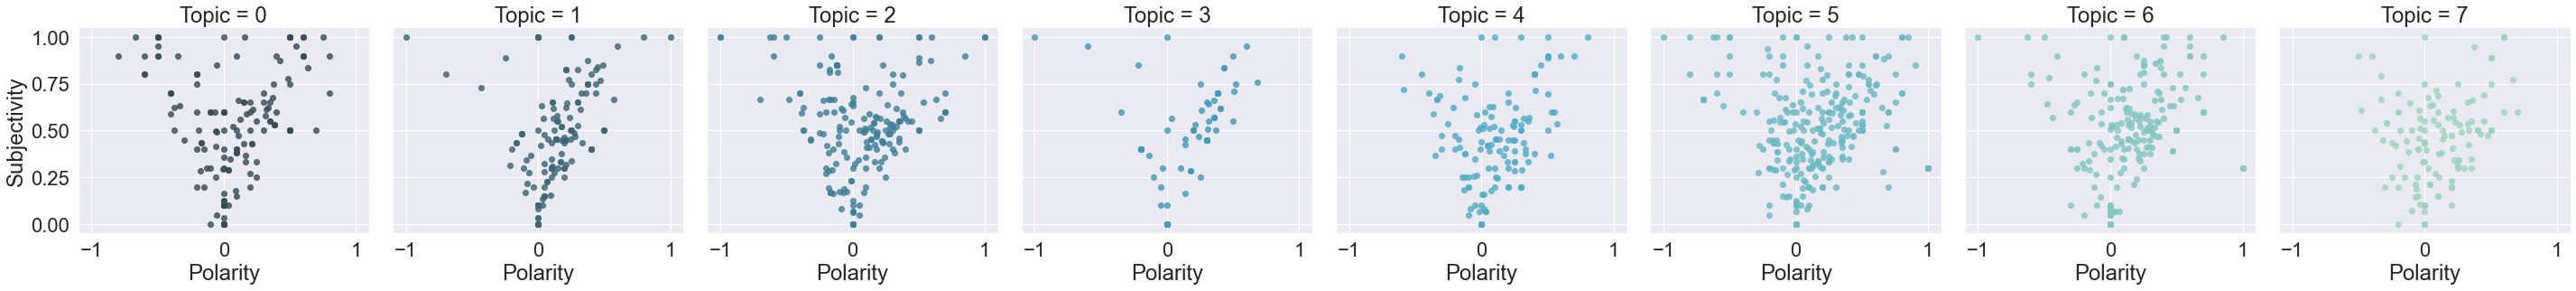

In [96]:
import seaborn as sns


plt.figure(figsize=(40,25)) 

g=sns.lmplot(x="Polarity", y="Subjectivity", hue='Topic', data=df, fit_reg=False, legend=False,palette="GnBu_d", col='Topic', legend_out=True)
 
# # Move the legend to an empty part of the plot
# plt.legend(loc='lower right')
 
plt.show()

In [97]:
df2 = df_1.groupby(['Topic'])['Analysis_Polarity'].value_counts().unstack('Topic').transpose()

df2

Analysis_Polarity,Negative,Neutral,Positive
Topic,,,
0,47,373,74
1,19,109,115
2,73,65,96
3,15,26,65
4,40,55,88
5,80,131,177
6,40,82,138
7,40,68,77


In [98]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8 entries, 0 to 7
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   Negative  8 non-null      int64
 1   Neutral   8 non-null      int64
 2   Positive  8 non-null      int64
dtypes: int64(3)
memory usage: 256.0 bytes


In [99]:
df2['Total'] = df2.sum(axis=1)

In [100]:
df2.columns

Index(['Negative', 'Neutral', 'Positive', 'Total'], dtype='object', name='Analysis_Polarity')

In [101]:
for i in df2:
    df2[i] = round(df2[i]*100/df2.Total)

df2

Analysis_Polarity,Negative,Neutral,Positive,Total
Topic,,,,
0,10.0,76.0,15.0,100.0
1,8.0,45.0,47.0,100.0
2,31.0,28.0,41.0,100.0
3,14.0,25.0,61.0,100.0
4,22.0,30.0,48.0,100.0
5,21.0,34.0,46.0,100.0
6,15.0,32.0,53.0,100.0
7,22.0,37.0,42.0,100.0


In [102]:
df2=df2.fillna(0)

In [103]:
#Conduct Polarity Topic Analysis using Tableau

df.to_excel("Polarity_Topic Modeling.xlsx")

In [104]:
df2= df2.drop(['Total'], axis=1)

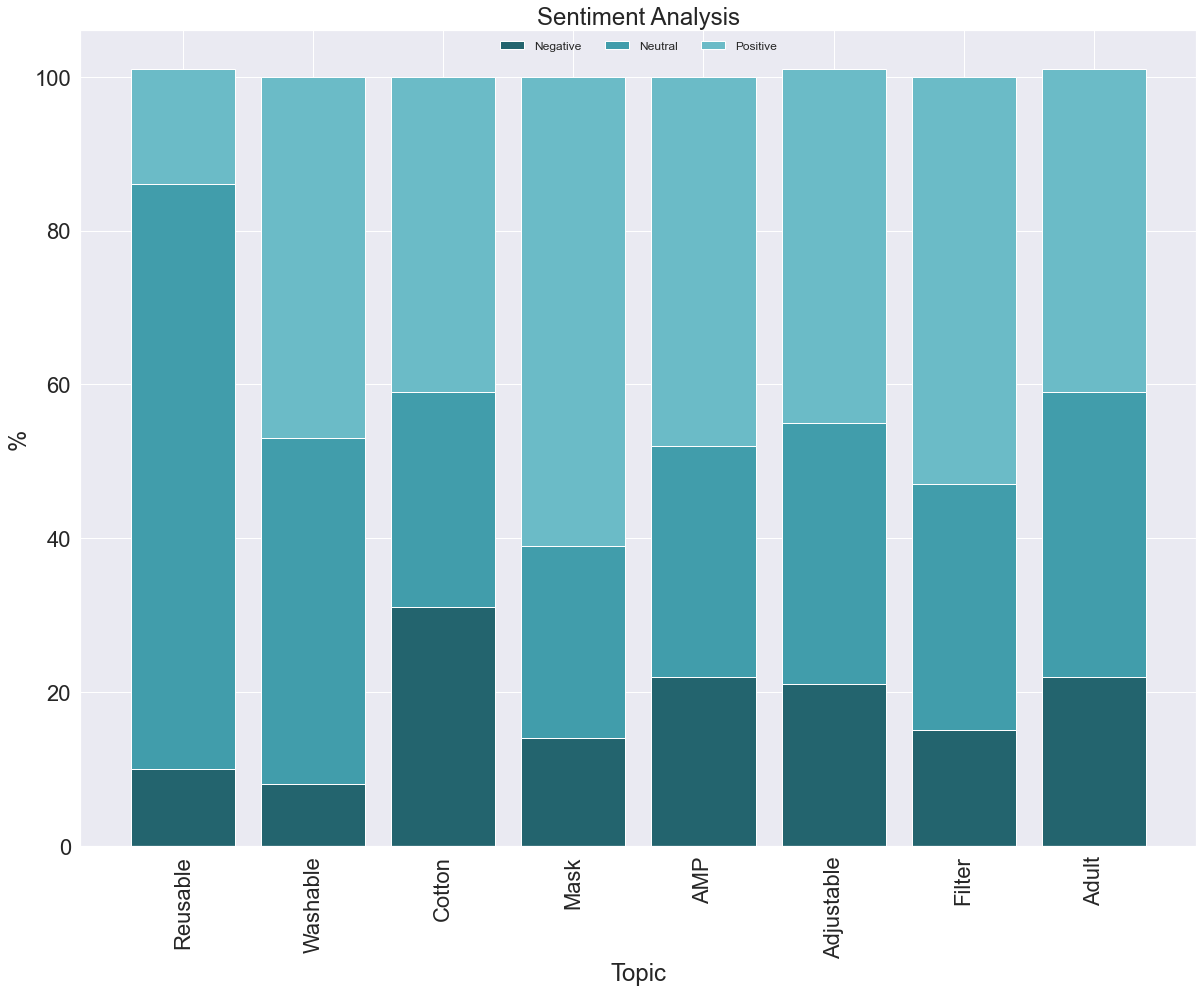

In [105]:
#Plotting and visualizing the counts
plt.figure(figsize=(20,15)) 


topic = ['Reusable','Washable','Cotton','Mask','AMP','Adjustable','Filter','Adult']
sentiment = ['Negative', 'Neutral', 'Positive']
plt.title('Sentiment Analysis')
plt.xlabel('Sentiment')
plt.ylabel('%')
p1=plt.bar(topic,df2['Negative'], color='#23646e')
p2=plt.bar(topic,df2['Neutral'], color='#419dab', bottom=df2['Negative'])
p3=plt.bar(topic,df2['Positive'], color='#6bbbc7', bottom=df2['Neutral']+df2['Negative'])
plt.xticks(topic, rotation=90)
plt.xlabel("Topic")
plt.legend((p1[0], p2[0], p3[0]),('Negative', 'Neutral', 'Positive'),fontsize=12, ncol=4, framealpha=0, fancybox=True, loc='upper center')

plt.show()


In [106]:
df2.columns

Index(['Negative', 'Neutral', 'Positive'], dtype='object', name='Analysis_Polarity')

In [107]:
df=df.replace({0:'Reusable',1:'Washable',2:'Cotton',3:'Mask',4:'AMP',5:'Adjustable',6:'Filter',7:'Adult'})

In [108]:
df.head()

,place,tweet,near,geo,Date,Year,Month,cleaned_tweets,Subjectivity,Polarity,Analysis_Polarity,Analysis_Subjectivity,Topic
0,,Wear a face mask!,,,2020-11-11,2020,11,wear a face mask,Reusable,Reusable,Neutral,Fact,Adult
1,,its good but not new. there is another one photoshopped onto a real tweet from Biden to trump last week.,,,2020-11-11,2020,11,its good but not new there is another one photoshopped onto a real tweet from biden to trump last week,0.355303,0.207955,Positive,Opinion,Adjustable
2,,"""The answer's none... not a single face mask..."" nicely timed 30 second clip provided by Johnson for to use at election time, if Johnson is still around...👇",,,2020-11-11,2020,11,the answer s none not a single face mask nicely timed 30 second clip provided by johnson for to use at election time if johnson is still around,0.404762,0.211905,Positive,Opinion,Adult
3,,do a face mask,,,2020-11-11,2020,11,do a face mask,Reusable,Reusable,Neutral,Fact,Reusable
4,,Bambam tulog tulog den,,,2020-11-11,2020,11,bambam tulog tulog den,Reusable,Reusable,Neutral,Fact,Reusable


# Topic Counts

In [109]:
# Show the value counts
df['Topic'].value_counts()

Reusable      494
Adjustable    388
Filter        260
Washable      243
Cotton        234
Adult         185
AMP           183
Mask          106
Name: Topic, dtype: int64

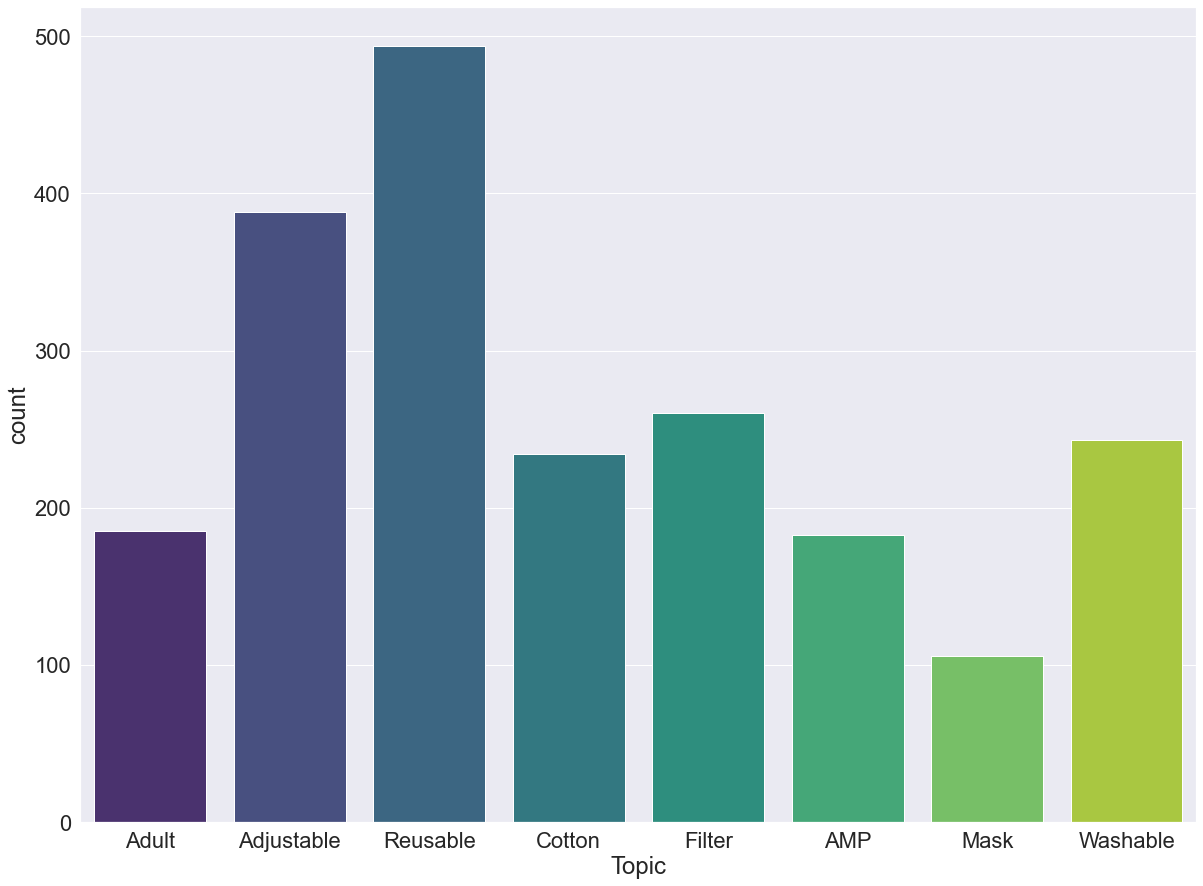

In [110]:
plt.figure(figsize=(20,15)) 
sns.countplot(x = 'Topic',data = df, palette = 'viridis')


# TREND ANALYSIS

In [111]:
# Create date range with frequency of a day
rng = pd.date_range(start='05/10/2020', end ='01/03/2020',freq='D')



In [112]:

df3 = df.groupby(['Date','Topic'])['cleaned_tweets'].count().reset_index()

In [113]:
df3

,Date,Topic,cleaned_tweets
0,2020-11-11,AMP,183
1,2020-11-11,Adjustable,388
2,2020-11-11,Adult,185
3,2020-11-11,Cotton,234
4,2020-11-11,Filter,260
5,2020-11-11,Mask,106
6,2020-11-11,Reusable,494
7,2020-11-11,Washable,243


In [114]:
pivoted = df3.pivot( index='Date',columns='Topic', values='cleaned_tweets').reset_index()

In [115]:
pivoted

Topic,Date,AMP,Adjustable,Adult,Cotton,Filter,Mask,Reusable,Washable
0,2020-11-11,183,388,185,234,260,106,494,243


In [116]:
pivoted=pivoted.fillna(0)

In [117]:
pivoted.to_csv("tweets_by_date.csv")

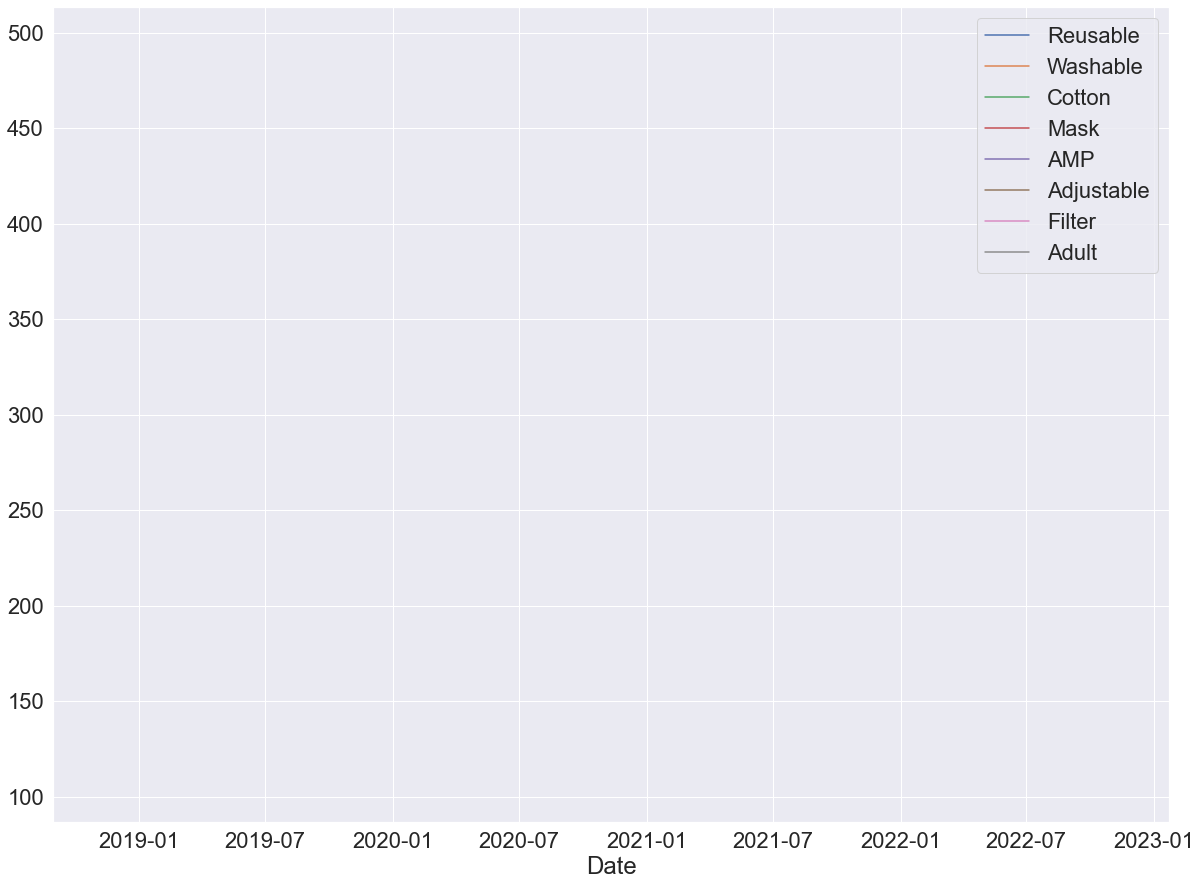

In [118]:
import matplotlib.dates as mdates

plt.figure(figsize=(20,15)) 

# gca stands for 'get current axis'
ax = plt.gca()

pivoted.plot(kind='line', x='Date', y='Reusable', label='Reusable',ax=ax)
pivoted.plot(kind='line', x='Date', y='Washable', label='Washable',ax=ax)
pivoted.plot(kind='line', x='Date', y='Cotton', label='Cotton',ax=ax)
pivoted.plot(kind='line', x='Date', y='Mask', label='Mask',ax=ax)
pivoted.plot(kind='line', x='Date', y='AMP', label='AMP',ax=ax)
pivoted.plot(kind='line', x='Date', y='Adjustable', label='Adjustable',ax=ax)
pivoted.plot(kind='line', x='Date', y='Filter', label='Filter',ax=ax)
pivoted.plot(kind='line', x='Date', y='Adult', label='Adult',ax=ax)



# ax.xaxis_date()
# ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'));

plt.legend()
plt.show()



# CLUSTER ANALYSIS WITH HEATMAP

In [119]:
# # Preparing a corpus for analysis and checking first 10 entries

corpus=[]
a=[]
for i in range(len(df['cleaned_tweets'])):
    a=df['cleaned_tweets'][i]
    corpus.append(a)
        
print(corpus[0:10])

['wear a face mask', 'its good but not new there is another one photoshopped onto a real tweet from biden to trump last week', 'the answer s none not a single face mask nicely timed 30 second clip provided by johnson for to use at election time if johnson is still around', 'do a face mask', 'bambam tulog tulog den', 'i just don t want to be doing somehow sitting in the oval office behind that beautiful resolute desk i think wearing a face mask as i greet presidents prime ministers dictators kings queens i don t know it somehow i don t see it for myself trump said', 'tell me about it two high schools here none bar the few wearing a facemask outside it s almost as if there isn t a pandemic and we should all just carry on', 'pinellas county florida mom arrested during school board meeting refusing to wear face mask turner county school 19', 'the stage is contaminated with his germs why he touched hos face mask and the mic', 'multhanimatti face pack for all skin types for instant glow via'

In [120]:
import os
import gensim
from gensim import corpora, models, similarities
import logging
import tempfile
from nltk.corpus import stopwords
from string import punctuation
from collections import OrderedDict
import seaborn as sns
import pyLDAvis.gensim
import matplotlib.pyplot as plt
%matplotlib inline

# init_notebook_mode(connected=True) #do not miss this line

C:\Users\andyo\anaconda3\lib\site-packages\scipy\sparse\sparsetools.py:21: DeprecationWarning:

`scipy.sparse.sparsetools` is deprecated!
scipy.sparse.sparsetools is a private module for scipy.sparse, and should not be used.



In [121]:
# removing common words and tokenizing
list1 = ['RT','rt']
stoplist = stopwords.words('english') + list(punctuation) + list1

texts = [[word for word in str(document).lower().split() if word not in stoplist] for document in corpus]

dictionary = corpora.Dictionary(texts)

# print(dictionary)
# print(dictionary.token2id)

In [122]:
corpus = [dictionary.doc2bow(text) for text in texts]

In [123]:
tfidf = models.TfidfModel(corpus) # step 1 -- initialize a model

In [124]:
corpus_tfidf = tfidf[corpus]  # step 2 -- use the model to transform vectors

In [125]:
total_topics = 2

lda = models.LdaModel(corpus, id2word=dictionary, num_topics=total_topics)
corpus_lda = lda[corpus_tfidf] # create a double wrapper over the original corpus: bow->tfidf->fold-in-lsi

#Show first n important word in the topics:
lda.show_topics(total_topics,10)

[(0,
  '0.055*"face" + 0.050*"mask" + 0.008*"facemask" + 0.007*"get" + 0.006*"amp" + 0.006*"wear" + 0.005*"masks" + 0.005*"one" + 0.004*"go" + 0.004*"hair"'),
 (1,
  '0.062*"mask" + 0.061*"face" + 0.008*"amp" + 0.008*"via" + 0.006*"wear" + 0.005*"wearing" + 0.005*"like" + 0.005*"cotton" + 0.004*"changed" + 0.004*"washable"')]

In [126]:

total_topics = 3

lda = models.LdaModel(corpus, id2word=dictionary, num_topics=total_topics)
corpus_lda = lda[corpus_tfidf] # create a double wrapper over the original corpus: bow->tfidf->fold-in-lsi

#Show first n important word in the topics:
lda.show_topics(total_topics,10)

[(0,
  '0.014*"facemask" + 0.013*"mask" + 0.012*"face" + 0.008*"one" + 0.006*"amp" + 0.005*"island" + 0.005*"nak" + 0.005*"parker" + 0.005*"burberry" + 0.004*"spend"'),
 (1,
  '0.076*"mask" + 0.075*"face" + 0.010*"via" + 0.008*"amp" + 0.006*"wearing" + 0.005*"cotton" + 0.005*"got" + 0.004*"like" + 0.004*"masks" + 0.004*"help"'),
 (2,
  '0.062*"face" + 0.057*"mask" + 0.010*"wear" + 0.009*"get" + 0.006*"amp" + 0.005*"work" + 0.005*"like" + 0.005*"see" + 0.005*"facemask" + 0.005*"big"')]

In [127]:
data_lda = {i: OrderedDict(lda.show_topic(i,10)) for i in range(total_topics)}
data_lda

{0: OrderedDict([('facemask', 0.013769979),
              ('mask', 0.012547124),
              ('face', 0.012404696),
              ('one', 0.007910047),
              ('amp', 0.0060420213),
              ('island', 0.005240657),
              ('nak', 0.004562814),
              ('parker', 0.0045562303),
              ('burberry', 0.0045562303),
              ('spend', 0.004253797)]),
 1: OrderedDict([('mask', 0.07568079),
              ('face', 0.075324655),
              ('via', 0.009564714),
              ('amp', 0.007904945),
              ('wearing', 0.00563299),
              ('cotton', 0.0046813856),
              ('got', 0.0045159496),
              ('like', 0.004391043),
              ('masks', 0.004297012),
              ('help', 0.0041831946)]),
 2: OrderedDict([('face', 0.062129475),
              ('mask', 0.057078697),
              ('wear', 0.0100726085),
              ('get', 0.009181957),
              ('amp', 0.0064740763),
              ('work', 0.00508928),
         

In [128]:

df_lda = pd.DataFrame(data_lda)
df_lda = df_lda.fillna(0).T
print(df_lda.shape)

(3, 22)


In [129]:
df_lda

,facemask,mask,face,one,amp,island,nak,parker,burberry,spend,...,cotton,got,like,masks,help,wear,get,work,see,big
0,0.013770,0.012547,0.012405,0.00791,0.006042,0.005241,0.004563,0.004556,0.004556,0.004254,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.000000,0.075681,0.075325,0.00000,0.007905,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.004681,0.004516,0.004391,0.004297,0.004183,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.004671,0.057079,0.062129,0.00000,0.006474,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.004970,0.000000,0.000000,0.010073,0.009182,0.005089,0.004675,0.004557


In [130]:
try_lda=df_lda.T

In [131]:
try_lda

,0,1,2
facemask,0.013770,0.000000,0.004671
mask,0.012547,0.075681,0.057079
face,0.012405,0.075325,0.062129
one,0.007910,0.000000,0.000000
amp,0.006042,0.007905,0.006474
island,0.005241,0.000000,0.000000
nak,0.004563,0.000000,0.000000
parker,0.004556,0.000000,0.000000
burberry,0.004556,0.000000,0.000000
spend,0.004254,0.000000,0.000000


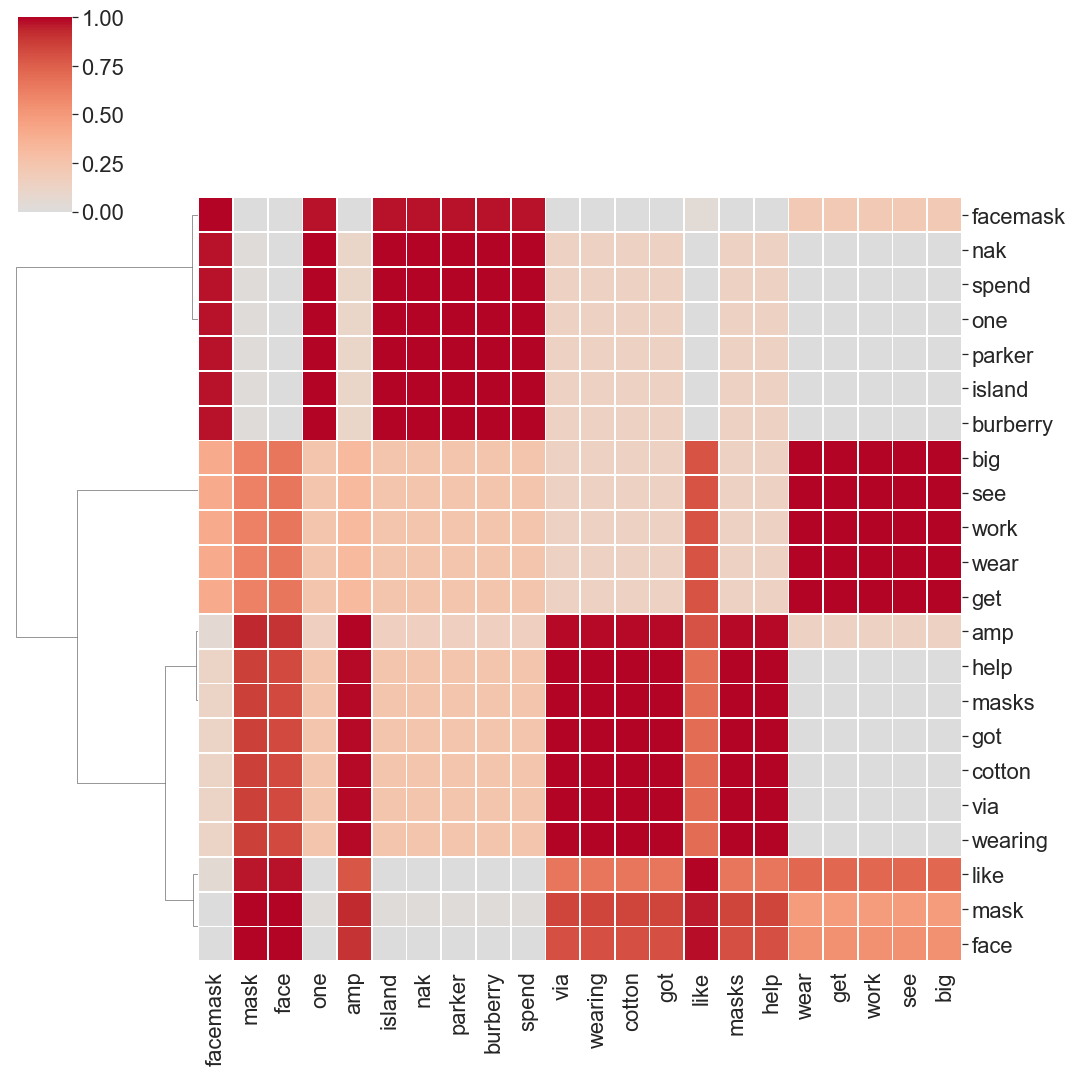

In [132]:
g=sns.clustermap(df_lda.corr(), center=0, standard_scale=1, cmap="coolwarm", metric='cosine', linewidths=.75, figsize=(15, 15), col_cluster=False)
plt.setp(g.ax_heatmap.yaxis.get_majorticklabels(), rotation=0)

plt.show()
#plt.setp(ax_heatmap.get_yticklabels(), rotation=0)  # For y axis

In [133]:

# pyLDAvis.enable_notebook()
# panel = pyLDAvis.gensim.prepare(lda, corpus_lda, dictionary, mds='tsne')
# panel

# CORRELATION 

In [134]:
import numpy as np
import pandas as pd
import seaborn as sns
import sklearn
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
plt.rcParams["patch.force_edgecolor"] = True
%matplotlib inline

In [135]:
dataset = pd.read_csv('tweets_by_date.csv')


# Statistical Summary

In [136]:
# Statistical summary
dataset.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,1.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0
AMP,1.0,183.0,NaN,183.0,183.0,183.0,183.0,183.0
Adjustable,1.0,388.0,NaN,388.0,388.0,388.0,388.0,388.0
Adult,1.0,185.0,NaN,185.0,185.0,185.0,185.0,185.0
Cotton,1.0,234.0,NaN,234.0,234.0,234.0,234.0,234.0
Filter,1.0,260.0,NaN,260.0,260.0,260.0,260.0,260.0
Mask,1.0,106.0,NaN,106.0,106.0,106.0,106.0,106.0
Reusable,1.0,494.0,NaN,494.0,494.0,494.0,494.0,494.0
Washable,1.0,243.0,NaN,243.0,243.0,243.0,243.0,243.0


In [137]:
# Identify continuous variables
print(dataset.select_dtypes(['float']).columns)

Index([], dtype='object')


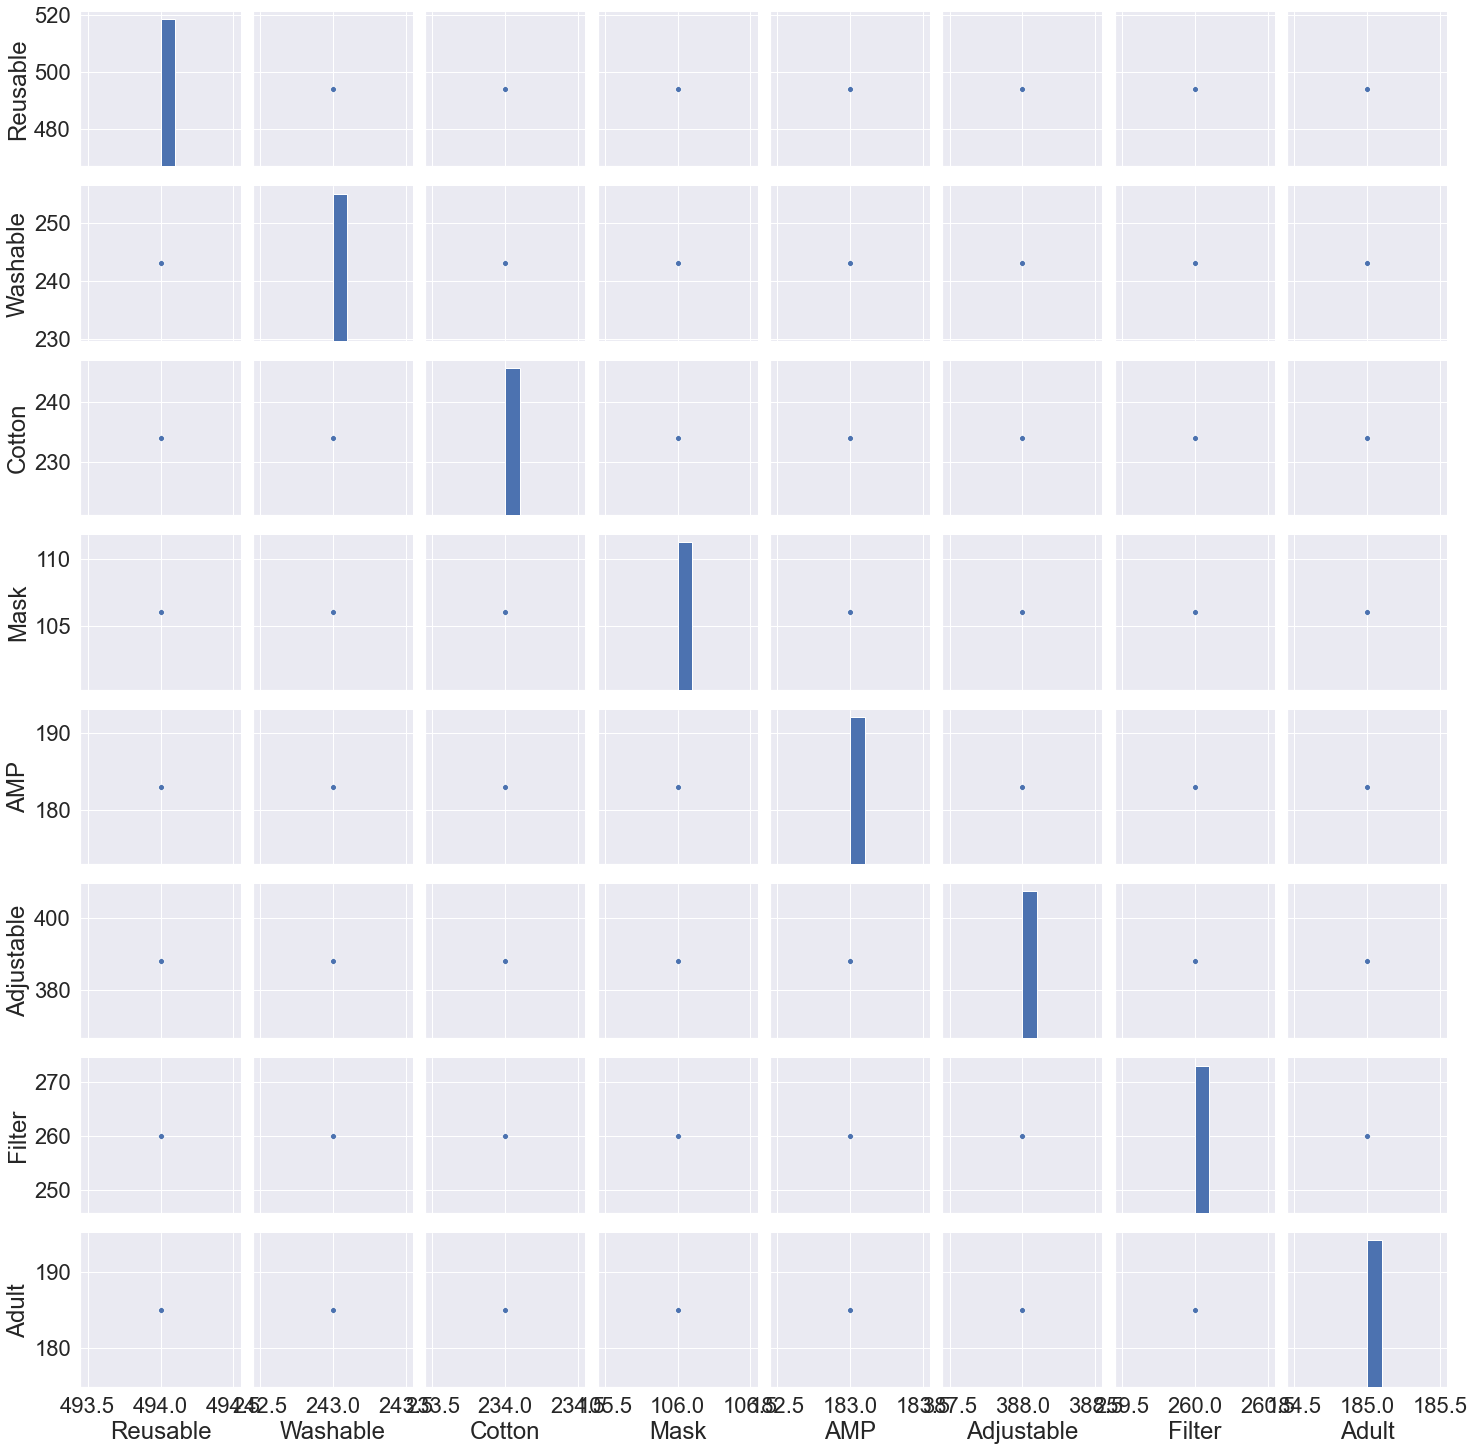

In [138]:

##Next, I want to compare the relationship (Correlation) between the identified topics in the dataset.

sns.pairplot(dataset[['Reusable','Washable','Cotton','Mask','AMP','Adjustable','Filter','Adult']])

plt.show()

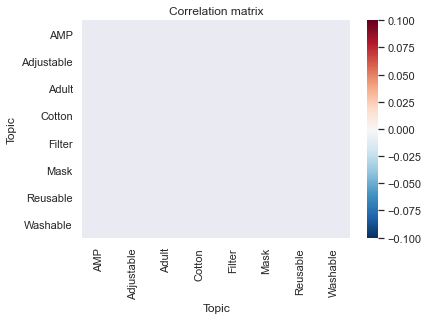

In [139]:
#This is another visual representation of Correlation Matrix to use
## SELECT COLORS https://python-graph-gallery.com/92-control-color-in-seaborn-heatmaps/


corrMatrix = pivoted.corr()

sns.set(font_scale=1)
sns.heatmap(corrMatrix, annot=False,
            xticklabels=corrMatrix.columns,
            yticklabels=corrMatrix.columns,
            cmap='RdBu_r'
            )
plt.title('Correlation matrix')
plt.show()

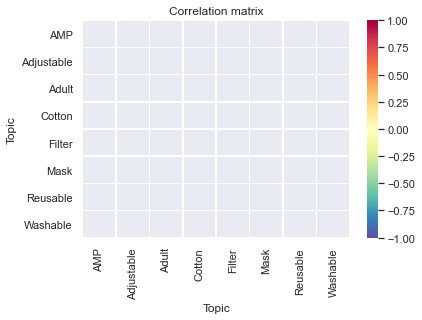

In [140]:
#This is another visual representation of Correlation Matrix to use
sns.set(font_scale=1)
sns.heatmap(corrMatrix, annot=True, linewidth = 0.5, cmap='Spectral_r',square=False, vmin = -1, vmax = 1)
plt.title('Correlation matrix')

plt.show()

# CLUSTER ANALYSIS HEATMAP

ValueError: The condensed distance matrix must contain only finite values.

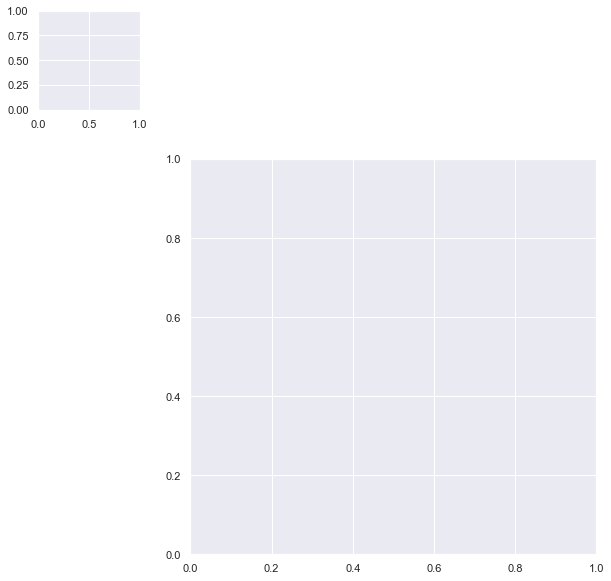

In [141]:
# Create cluter map
sns.clustermap(corrMatrix, annot=True, linewidth = 0.5, cmap='RdBu_r',square=False, vmin = -1, vmax = 1)
plt.title('Cluster Map')

plt.show()